# Problem Set 1

In [1]:
using Plots
using Distributions
using Integrals

## Individual labor supply curve


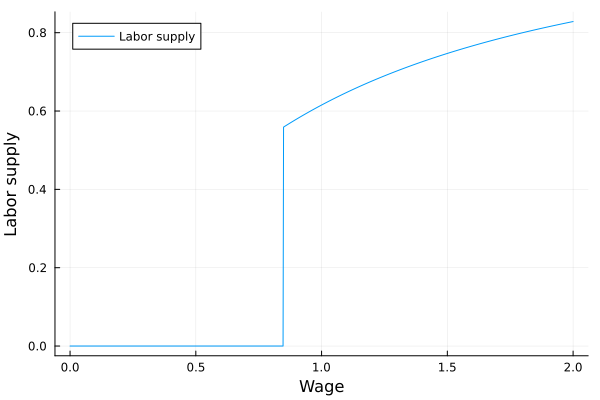

In [2]:
function intensive_label_supply(w, z, a, r, τ, T, η, χ, β)
    c_tmp = 1.0
    while true
        RHS = (z*w*(1-τ)/(η*c_tmp))^χ * z*w*(1-τ) + a*(1+r*(1-τ)) + T
        c_new = RHS/(1+β)
        err = abs(c_new - c_tmp)
        if err < 1e-8
            break
        else
            # println("err = ", err)
            c_tmp = c_new
        end
    end
    n = (z*w*(1-τ)/(c_tmp*η))^χ
    return c_tmp, n
end

function N(z, a, b, r, τ, T, β)
    c = (b + a*(1+r*(1-τ)) + T)/(1+β)
    a_prime = β*c
    return log(c) + β*log(a_prime)
end

function W(c_equi, n_equi, z, a, r, τ, T, η, χ, β)
    a_prime = β*c_equi
    return log(c_equi) - η*n_equi^(1+1/χ)/(1+1/χ) + β*log(a_prime)
end

function individual_label_supply(w, z, a, b, r, τ, T, η, χ, β)
    c_ifwork, n_ifwork = intensive_label_supply(w, z, a, r, τ, T, η, χ, β)
    N_val = N(z, a, b, r, τ, T, β)
    W_val = W(c_ifwork, n_ifwork, z, a, r, τ, T, η, χ, β)
    if W_val > N_val
        return c_ifwork, n_ifwork
    else
        c = (b + a*(1+r*(1-τ)) + T)/(1+β)
        return c, 0.0
    end
end

wage_grid = range(0.0, 2.0, length=1000)
labor_supply = map(wage_grid) do w
    # w, z, a, b, r, τ, T, η, χ, β
    individual_label_supply(w, z, a, b, r, τ, T, η, χ, β)[2]
end
plot(wage_grid, labor_supply, label="Labor supply", xlabel="Wage", ylabel="Labor supply")

## Aggregate labor supply curve

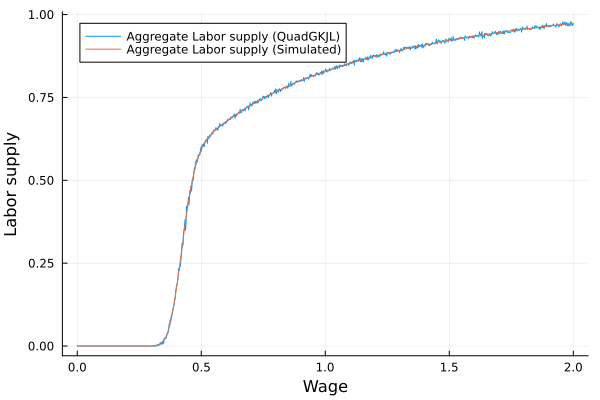

In [3]:

function aggregate_label_supply_quad_approx(w, a, b, r, τ, T, η, χ, β, z̄, σ_z)
    z_dist = LogNormal(log(z̄) - 0.5*σ_z^2, σ_z)
    labor_supply = solve(IntegralProblem((x,p) -> begin
        pdf(z_dist, x) * x * individual_label_supply(w, x, a, b, r, τ, T, η, χ, β)[2]
    end, (0.0, Inf)), QuadGKJL()).u
    return labor_supply
end

function aggregate_label_supply_simulated(w, a, b, r, τ, T, η, χ, β, z̄, σ_z)
    z_dist = LogNormal(log(z̄) - 0.5*σ_z^2, σ_z)
    z_vals = rand(z_dist, 1000)
    labor_supply = map(z_vals) do z
        z * individual_label_supply(w, z, a, b, r, τ, T, η, χ, β)[2]
    end
    return mean(labor_supply)
end


wage_grid = range(0.0, 2.0, length=1000)
labor_supply_quad_approx = map(wage_grid) do w
    aggregate_label_supply_quad_approx(w, 0.5, 0.1, 0.03, 0.2, 0.1, 1.5, 1.0, 0.98, 1.0, 0.1)
end
labor_supply_simulated = map(wage_grid) do w
    aggregate_label_supply_simulated(w, 0.5, 0.1, 0.03, 0.2, 0.1, 1.5, 1.0, 0.98, 1.0, 0.1)
end
plot(wage_grid, labor_supply_simulated, label="Aggregate Labor supply (QuadGKJL)", xlabel="Wage", ylabel="Labor supply")
plot!(wage_grid, labor_supply_quad_approx, label="Aggregate Labor supply (Simulated)", xlabel="Wage", ylabel="Labor supply")